      Año         Mes  República  Región I  Región II  Región III  Región IV  \
0    2011       Abril     103.17    102.66     104.76      103.01     105.13   
1    2011        Mayo     103.68    103.10     104.95      103.25     105.54   
2    2011       Junio     104.23    103.11     106.93      103.88     106.41   
3    2011       Julio     105.22    103.89     109.09      104.84     107.37   
4    2011      Agosto     105.85    104.29     110.01      105.35     108.72   
..    ...         ...        ...       ...        ...         ...        ...   
146  2023       Junio     169.87    140.99     257.91      159.97     240.12   
147  2023       Julio     171.06    141.53     264.64      161.34     242.17   
148  2023      Agosto     172.13    142.00     266.53      162.08     243.79   
149  2023  Septiembre     173.10    142.38     265.10      162.84     243.94   
150  2023     Octubre     175.29    143.28     265.14      164.58     246.65   

     Región V  Región VI  Región VII  R

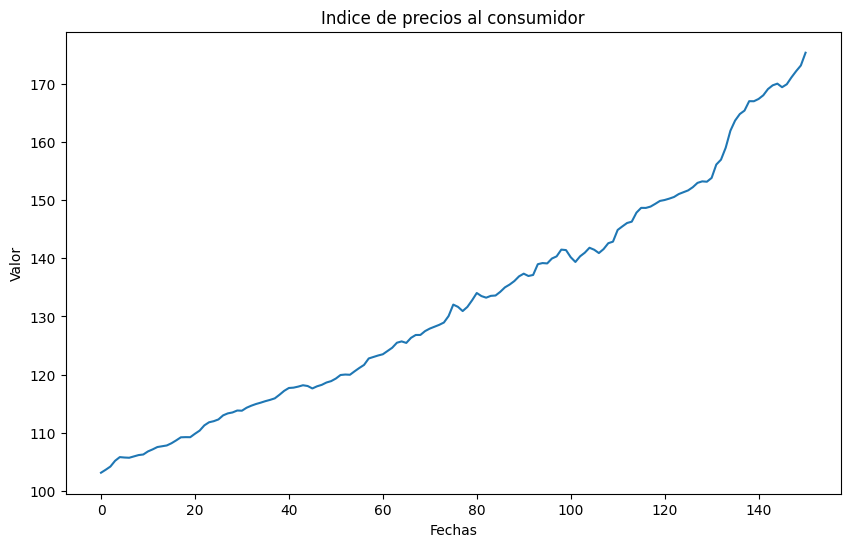

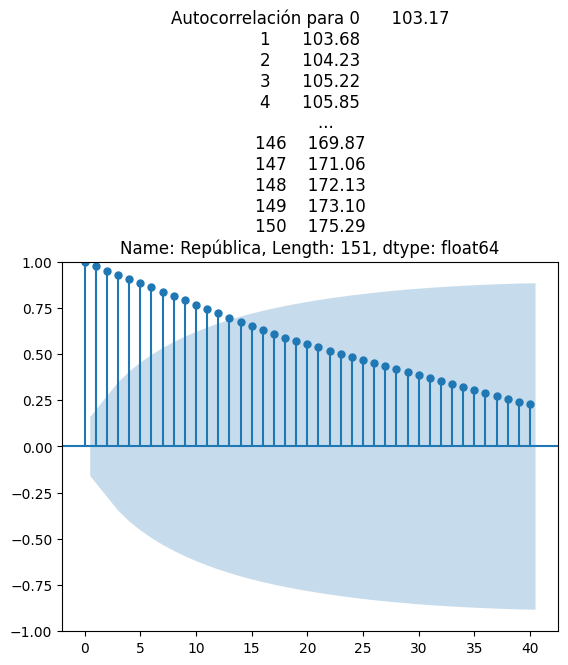

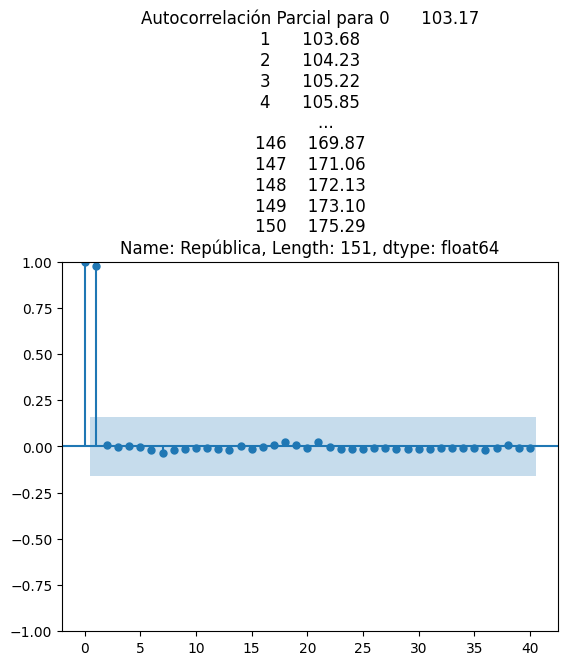

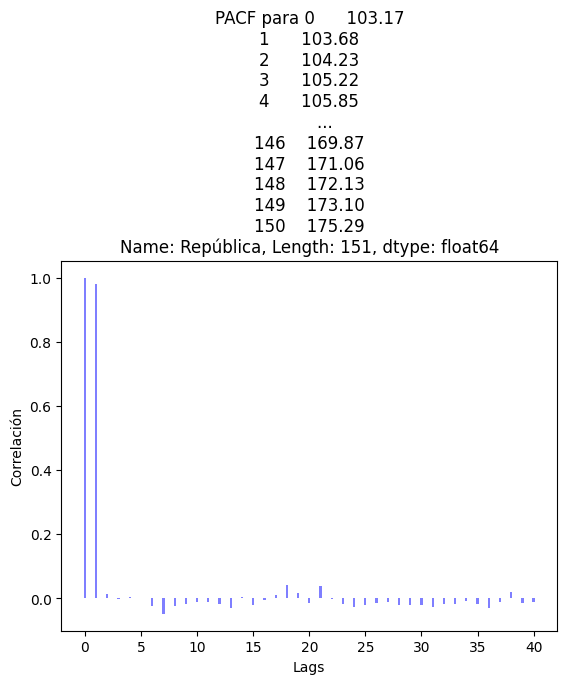

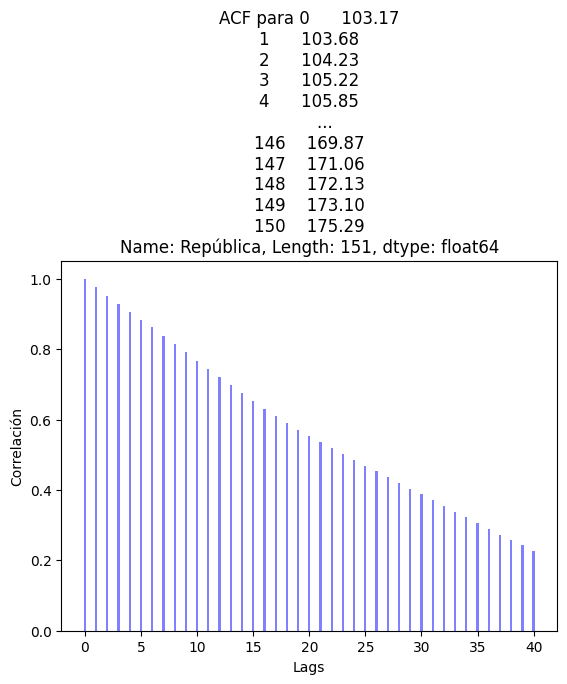

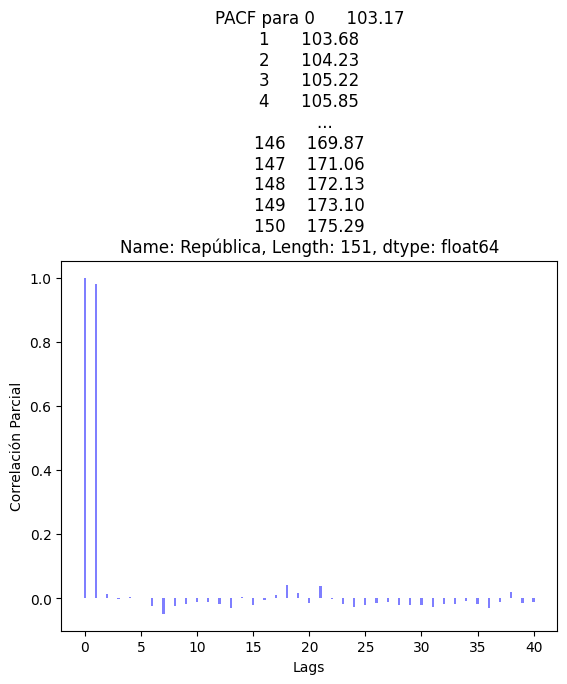

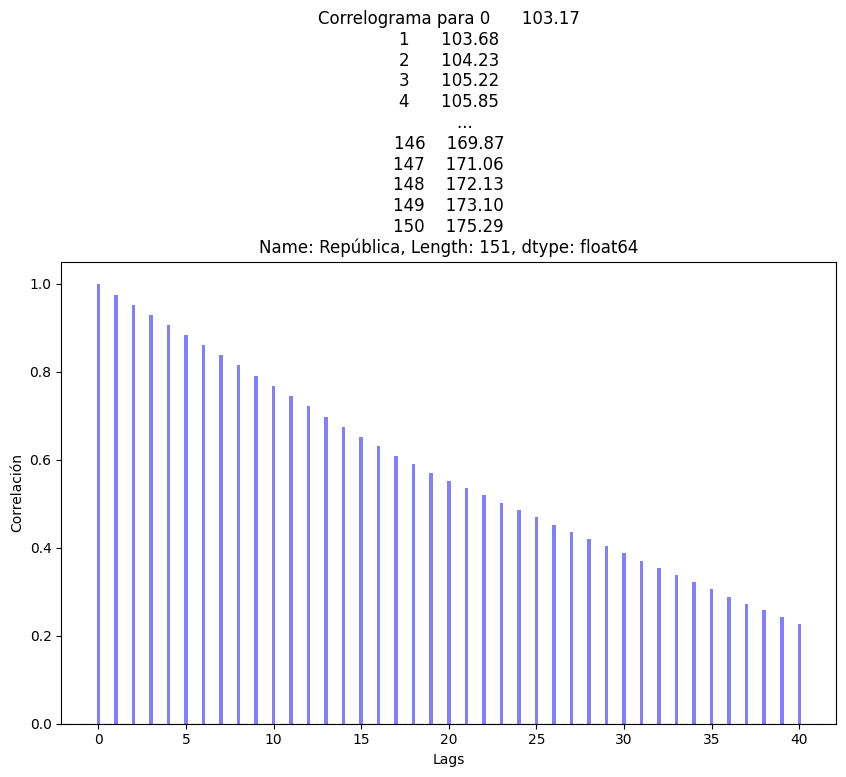

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

hoja = "Datos"
rango = "A:K"
ruta = 'C:/Users/tecnico_ine/Documents/Muestreo/ipc.xlsx'
datos = pd.read_excel(ruta, sheet_name=hoja, skiprows=3, usecols=rango)
print(datos)
print(datos.columns)

fechas = pd.date_range(start='2011-04-01', end='2023-10-31', freq='MS')
valores = datos["República"]
print(valores)

serie = pd.Series(valores, index=fechas)

#serie.plot(figsize=(10,6))
#plt.title("Indice de precios al consumidor")
#plt.xlabel("Fecha")
#plt.ylabel("Valor")
#plt.show()

print(datos.head())
print(datos["República"].head())

valores.plot(figsize=(10,6))
plt.title("Indice de precios al consumidor")
plt.xlabel("Fechas")
plt.ylabel("Valor")
plt.show()

retrasos = 40

# Realiza la gráfica de autocorrelación
sm.graphics.tsa.plot_acf(valores, lags=retrasos)  # Ajusta el número de lags según tus necesidades
plt.title(f"Autocorrelación para {valores}")
plt.show()

# Realiza la gráfica de autocorrelación parcial
sm.graphics.tsa.plot_pacf(valores, lags=retrasos)  # Ajusta el número de lags según tus necesidades
plt.title(f"Autocorrelación Parcial para {valores}")
plt.show()


# Calcula la PACF
pacf_vals, pacf_conf_int = sm.tsa.pacf(valores, nlags=retrasos, alpha=0.05)

# Visualiza la PACF
plt.bar(range(len(pacf_vals)), pacf_vals, width=0.2, alpha=0.5, color='b', label='PACF')
plt.xlabel('Lags')
plt.ylabel('Correlación')
plt.title(f'PACF para {valores}')
plt.show()

# Calcula la ACF
acf_vals, acf_conf_int = sm.tsa.acf(valores, nlags=retrasos, fft=False, alpha=0.05)

# Visualiza la ACF
plt.bar(range(len(acf_vals)), acf_vals, width=0.2, alpha=0.5, color='b', label='ACF')
plt.xlabel('Lags')
plt.ylabel('Correlación')
plt.title(f'ACF para {valores}')
plt.show()

# Calcula la PACF
pacf_vals, pacf_conf_int = sm.tsa.pacf(valores, nlags=retrasos, alpha=0.05)

# Visualiza la PACF
plt.bar(range(len(pacf_vals)), pacf_vals, width=0.2, alpha=0.5, color='b', label='PACF')
plt.xlabel('Lags')
plt.ylabel('Correlación Parcial')
plt.title(f'PACF para {valores}')
plt.show()


# Calcula la autocorrelación
acf_vals, acf_conf_int = sm.tsa.acf(valores, nlags=retrasos, fft=False, alpha=0.05)

# Visualiza el correlograma
plt.figure(figsize=(10, 6))
plt.bar(range(len(acf_vals)), acf_vals, width=0.2, alpha=0.5, color='b', label='ACF')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Línea horizontal en y=0
plt.xlabel('Lags')
plt.ylabel('Correlación')
plt.title(f'Correlograma para {valores}')
plt.show()
